In [1]:
pip install tensorflow opencv-python pandas numpy matplotlib scikit-learn


  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.1.3 which is incompatible.
datasets 3.5.0 requires dill<0.3.9,>=0.3.0, but you have dill 0.4.0 which is incompatible.
datasets 3.5.0 requires multiprocess<0.70.17, but you have multiprocess 0.70.18 which is incompatible.
deeplake 3.9.44 requires numpy<2.0, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
tensorflow-intel 2.17.0 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.1.3 which is incompatible.
tensorflow-intel 2.17.0 requir

In [5]:
data_dir = './archive/data'

In [ ]:
import os

img_ext = ['jpeg','jpg','png','bmp']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path =  os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread (image_path)
            tip =  imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image ./archive/data\happy\05-12-21-happy-people.jpg
Issue with image ./archive/data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image ./archive/data\happy\1-2.jpg
Issue with image ./archive/data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image ./archive/data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image ./archive/data\happy\154006829.jpg
Issue with image ./archive/data\happy\170404-happy-workers-feature.jpg
Issue with image ./archive/data\happy\1902539.jpg
Issue with image ./archive/data\happy\1902540.jpg
Issue with image ./archive/data\happy\1902587.jpg
Issue with image ./archive/data\happy\1920px-face-smile.svg_.png.jpg
Issue with image ./archive/data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image ./archive/data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image ./archive/data\happy\60632274._UY200_.jpg
Issue with image ./archive/data\happy\7-Habits-of-Happy-People-image.jpeg
Is

In [9]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('./archive/data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [11]:
scaled = batch[0]/255

In [12]:
data = data.map(lambda x,y:(x/255,y))

<Figure size 1000x1000 with 0 Axes>

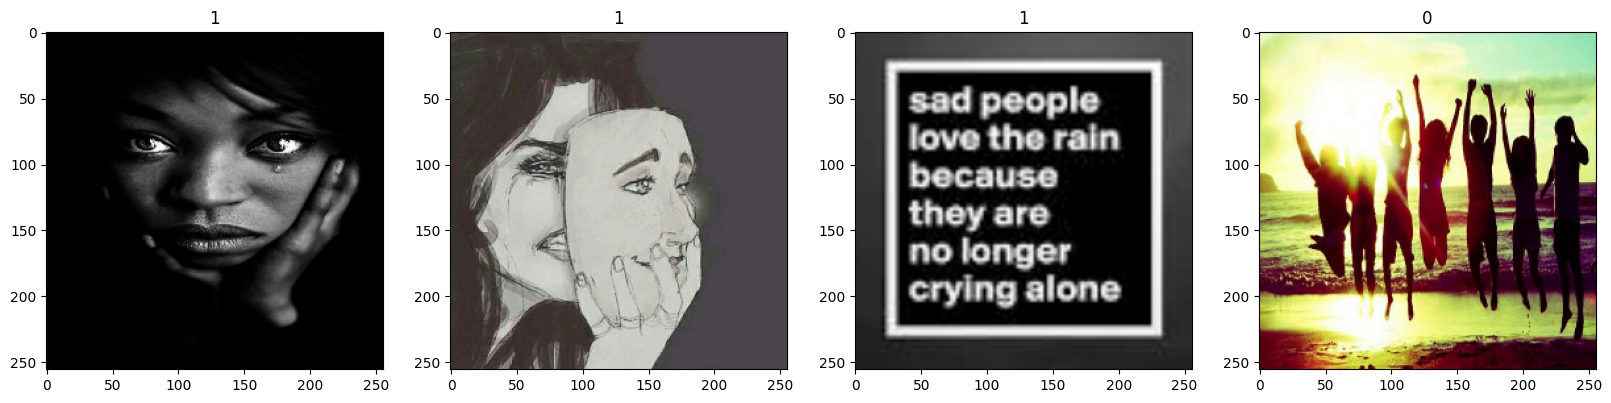

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\gyant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
logdr = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdr)

In [22]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5284 - loss: 1.1407 - val_accuracy: 0.4844 - val_loss: 0.7673
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 800ms/step - accuracy: 0.6034 - loss: 0.6819 - val_accuracy: 0.6406 - val_loss: 0.6202
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 885ms/step - accuracy: 0.7691 - loss: 0.5675 - val_accuracy: 0.7969 - val_loss: 0.5489
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 843ms/step - accuracy: 0.7642 - loss: 0.5194 - val_accuracy: 0.8281 - val_loss: 0.4580
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 822ms/step - accuracy: 0.8757 - loss: 0.3876 - val_accuracy: 0.8594 - val_loss: 0.2903
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 832ms/step - accuracy: 0.8603 - loss: 0.3016 - val_accuracy: 0.9375 - val_loss: 0.2185
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 898ms/step - accuracy: 0.9185 - loss: 0.2405 - val_accuracy: 0.9531 - val_loss: 0.1969
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 832ms/step - accuracy: 0.9462 - loss: 0.1936 - val_accuracy: 0.9844 - val_loss: 0

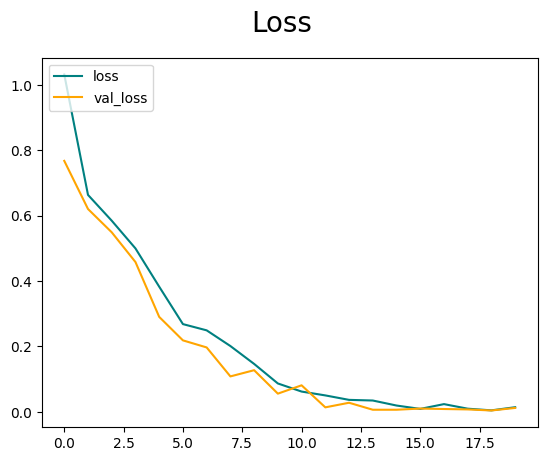

In [23]:
fig =  plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend (loc="upper left")
plt.show()

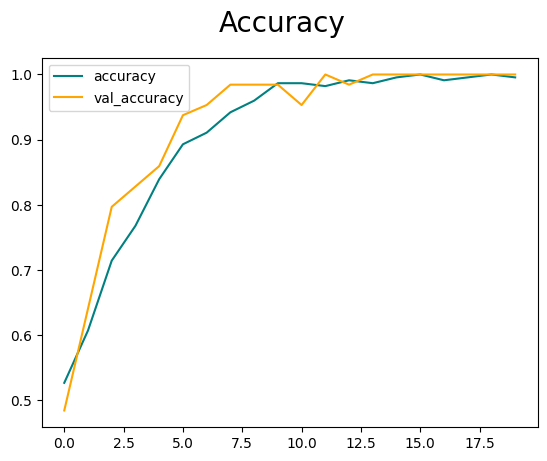

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend (loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat =  model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result())
print(re.result())
print(acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [45]:
import os

print(os.listdir('./archive'))


['data', 'Images', 'images (1).jpeg', 'metadata.csv', 'using-kaggle-models-for-image-classification.ipynb']


In [52]:
import cv2

img = cv2.imread('./archive/images.jpeg')
print("Image data:", img)


Image data: [[[119 148 155]
  [125 151 157]
  [136 157 159]
  ...
  [  3  72  57]
  [  3  72  57]
  [  2  71  56]]

 [[119 148 155]
  [126 152 158]
  [136 157 159]
  ...
  [ 36  95  87]
  [ 36  95  87]
  [ 35  94  86]]

 [[120 149 156]
  [127 153 159]
  [137 158 160]
  ...
  [ 77 119 124]
  [ 77 119 124]
  [ 76 118 123]]

 ...

 [[ 56  75 113]
  [ 60  79 117]
  [ 67  86 124]
  ...
  [ 61  54  51]
  [ 59  53  48]
  [ 56  50  45]]

 [[ 41  60  95]
  [ 47  66 101]
  [ 56  75 110]
  ...
  [ 59  57  57]
  [ 57  55  55]
  [ 56  51  52]]

 [[ 21  40  73]
  [ 27  46  79]
  [ 38  57  90]
  ...
  [ 56  59  64]
  [ 54  57  62]
  [ 53  54  58]]]


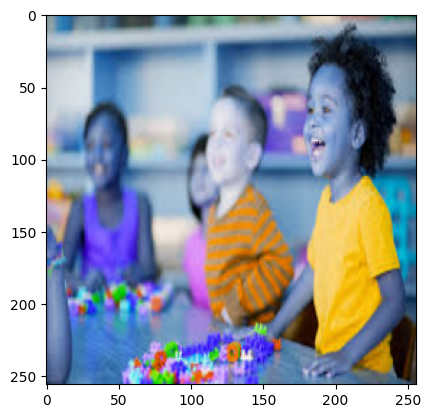

In [53]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


In [62]:
if yhat > 0.5:
    print("Person is Sad")
else:
    print("Person is Happy")

Person is Happy


In [63]:
model.save(os.path.join('models','imageClassfierMode.h5'))

In [64]:
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join('models','imageClassfierMode.h5'))
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


array([[0.0843135]], dtype=float32)